In [1]:
import warnings
import requests
from datetime import datetime
from tqdm import tqdm
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
# warning 메시지 출력 안함
warnings.filterwarnings('ignore')

In [3]:
# 최신 회차 크롤링 함수
def get_max_count():
    url = 'https://dhlottery.co.kr/common.do?method=main'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')
    max_count = int(soup.find('strong', id='lottoDrwNo').text)
    return max_count

In [4]:
# 로또 당첨번호 정보 조회 함수
def crawling_lotto(count):
    # url에 회차를 실어 페이지 조회
    url = f'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo={count}'
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'lxml')

    date = datetime.strptime(soup.find('p', class_='desc').text, '(%Y년 %m월 %d일 추첨)')
    win_number = [int(i) for i in soup.find('div', class_='num win').find('p').text.strip().split('\n')]
    bonus_number = int(soup.find('div', class_='num bonus').find('p').text.strip())

    return {
        'date' : date,
        'win_number' : win_number,
        'bonus_number' : bonus_number
    }

In [5]:
# 최신 회차 가져오기
max_count = get_max_count()

# 전체 회차 크롤링
data_list = []
for i in tqdm(range(1, max_count + 1)):
    result = crawling_lotto(i)
    data_list.append({
        'date' : result['date'],
        'num1' : result['win_number'][0],
        'num2' : result['win_number'][1],
        'num3' : result['win_number'][2],
        'num4' : result['win_number'][3],
        'num5' : result['win_number'][4],
        'num6' : result['win_number'][5],
        'bonus' : result['bonus_number']
    })
# 데이터를 데이터프레임으로 변환
data = pd.DataFrame(data_list)
data

100%|██████████| 1133/1133 [13:44<00:00,  1.37it/s]   


,date,num1,num2,num3,num4,num5,num6,bonus
0,2002-12-07,10,23,29,33,37,40,16
1,2002-12-14,9,13,21,25,32,42,2
2,2002-12-21,11,16,19,21,27,31,30
3,2002-12-28,14,27,30,31,40,42,2
4,2003-01-04,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...,...
1128,2024-07-20,5,10,11,17,28,34,22
1129,2024-07-27,15,19,21,25,27,28,40
1130,2024-08-03,1,2,6,14,27,38,33
1131,2024-08-10,6,7,19,28,34,41,5


In [6]:
# 크롤링한 로또번호를 csv파일로 저장
csv_filename = 'lotto_result.csv'
data.to_csv(csv_filename, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 '{csv_filename}' 이름으로 저장되었습니다.")

CSV 파일이 'lotto_result.csv' 이름으로 저장되었습니다.


In [7]:
# 저장한 csv파일 불러오기
csv_filename = 'lotto_result.csv'
lotto_data = pd.read_csv(csv_filename, encoding='utf-8-sig')

In [8]:
# 로또 번호를 한 리스트에 모으기
numbers = []
columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']

for column in columns:
    for number in lotto_data[column]:
        numbers.append(number)

In [9]:
# 필요 패키지 import
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [10]:
#numbers

In [11]:
# 숫자의 빈도 계산
number_counts = Counter(numbers)

In [12]:
number_counts

Counter({34: 175,
         18: 165,
         14: 164,
         12: 164,
         13: 163,
         45: 163,
         33: 161,
         40: 161,
         27: 160,
         17: 159,
         20: 158,
         1: 157,
         43: 157,
         37: 156,
         11: 154,
         3: 154,
         19: 154,
         21: 154,
         7: 153,
         31: 153,
         38: 153,
         39: 153,
         26: 152,
         44: 152,
         10: 151,
         16: 151,
         6: 151,
         24: 151,
         36: 151,
         4: 150,
         15: 150,
         35: 148,
         2: 144,
         30: 144,
         42: 144,
         8: 143,
         5: 143,
         29: 141,
         25: 140,
         28: 140,
         41: 139,
         23: 136,
         22: 134,
         32: 133,
         9: 119})

In [13]:
number_counts.items()

dict_items([(10, 151), (9, 119), (11, 154), (14, 164), (16, 151), (2, 144), (8, 143), (1, 157), (22, 134), (3, 154), (6, 151), (4, 150), (5, 143), (7, 153), (13, 163), (17, 159), (26, 152), (12, 164), (19, 154), (21, 154), (24, 151), (15, 150), (35, 148), (18, 165), (25, 140), (23, 136), (20, 158), (29, 141), (27, 160), (30, 144), (31, 153), (32, 133), (28, 140), (34, 175), (36, 151), (33, 161), (37, 156), (38, 153), (39, 153), (40, 161), (42, 144), (41, 139), (43, 157), (44, 152), (45, 163)])

In [14]:
number_counts_str = {str(key): value for key, value in number_counts.items()}

In [15]:
# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(number_counts_str)

In [16]:
import matplotlib.pyplot as plt

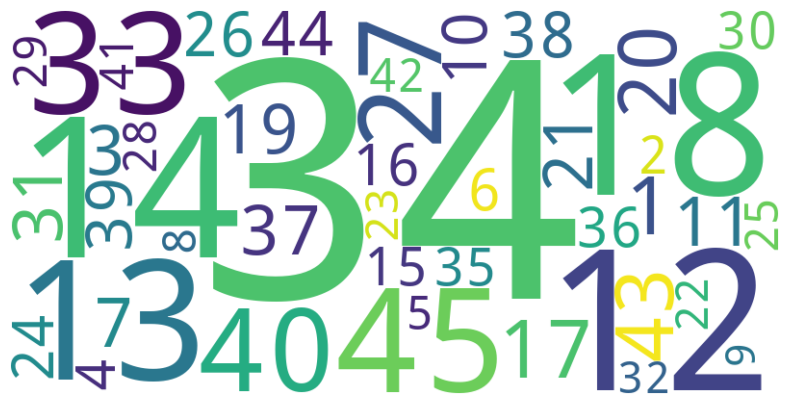

In [17]:
# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# 데이터를 정렬된 리스트로 변환
labels, values = zip(*sorted(number_counts.items()))

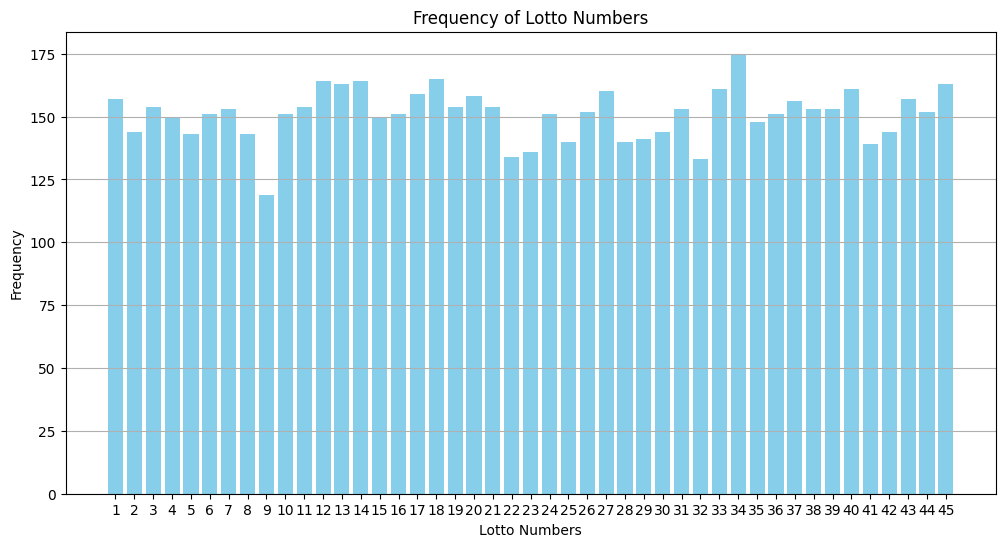

In [19]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Lotto Numbers')
plt.ylabel('Frequency')
plt.title('Frequency of Lotto Numbers')
plt.xticks(range(min(labels), max(labels)+1))
plt.grid(axis='y')

#그래프 표시
plt.show()

In [20]:
# 퍼센티지 계산

number_percentages = {key: (value / 1123) * 100 for key, value in number_counts.items()}

In [21]:
# 데이터를 정렬된 리스트로 변환
labels, values = zip(*sorted(number_percentages.items()))

In [22]:
#values

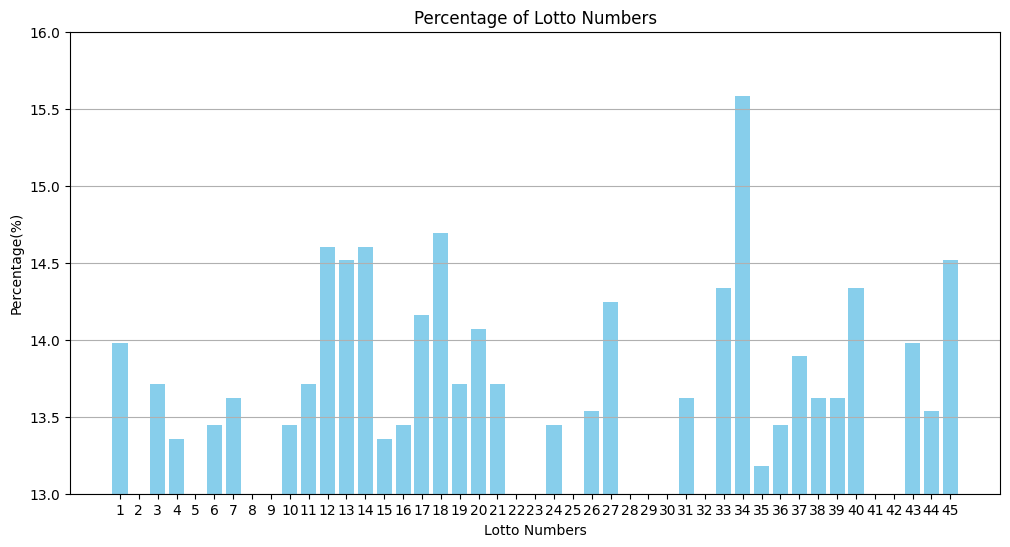

In [23]:
# 막대 그래프 생성
plt.figure(figsize=(12, 6))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Lotto Numbers')
plt.ylabel('Percentage(%)')
plt.title('Percentage of Lotto Numbers')
plt.xticks(range(min(labels), max(labels)+1))
plt.ylim(13, 16) # y축 범위를 10부터 16까지로 설정
plt.grid(axis='y')

# 그래프 표시
plt.show()

In [24]:
import seaborn as sns

In [25]:
# 데이터를 값(Value) 기준으로 내림차순 정렬
sorted_items = sorted(number_percentages.items(), key=lambda item:item[1], reverse=True)
labels, values = zip(*sorted_items)

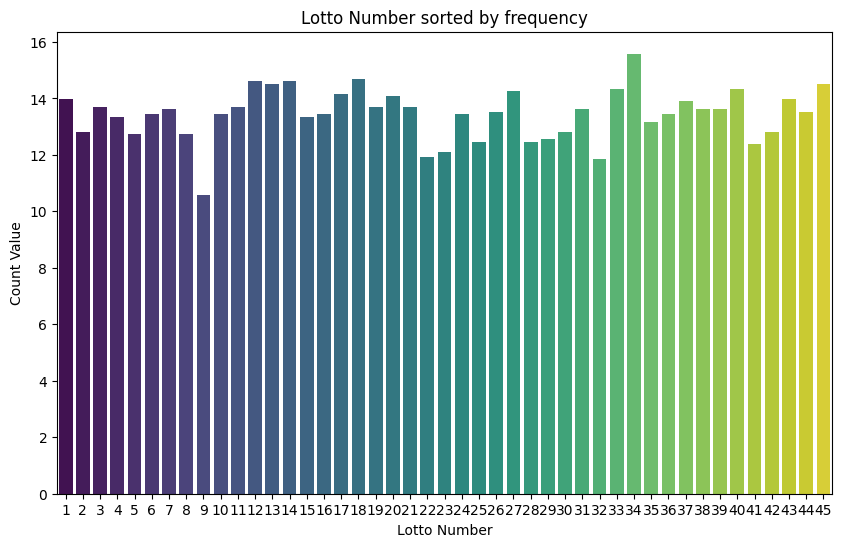

In [26]:
# seaborn 막대 그래프 생성
plt.figure(figsize=(10, 6))
sns.barplot(x=list(labels), y=list(values), palette='viridis')
plt.xlabel('Lotto Number')
plt.ylabel('Count Value')
plt.title('Lotto Number sorted by frequency')
plt.show()


In [27]:
from datetime import datetime
from meteostat import Point, Daily

In [28]:
# 서울 위치 설정 (위도, 경도, 고도)
location = Point(37.5665, 126.9780, 38) #서울 위치

In [29]:
# 날짜 형식 변환
lotto_data['date'] = pd.to_datetime(lotto_data['date'])

In [30]:
# 기상 데이터를 저장할 리스트
weather_data = []

In [31]:
# 각 날짜에 대한 기상 데이터 가져오기
for date in lotto_data['date']:
    start = datetime(date.year, date.month, date.day)
    end = start
    data = Daily(location, start, end)
    data = data.fetch()

    if not data.empty :
        weather_info = {
            'date':date,
            'tmin':data['tmin'].values[0] if 'tmin' in data else None,
            'tmax':data['tmax'].values[0] if 'tmax' in data else None,
            'tavg':data['tavg'].values[0] if 'tavg' in data else None,
            'wdir':data['wdir'].values[0] if 'wdir' in data else None,
            'wspd':data['wspd'].values[0] if 'wspd' in data else None,
        }
    else:
        weather_info = {
            'date':date,
            'tmin':None,
            'tmax':None,
            'tavg':None,
            'wdir':None,
            'wspd':None,
        }
    
    weather_data.append(weather_info)

# 기상 데이터를 데이터프레임으로 변환
weather_df = pd.DataFrame(weather_data)

weather_df

,date,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,-0.1,6.9,5.2,342.0,11.7
1,2002-12-14,-5.1,4.5,2.0,NaN,NaN
2,2002-12-21,3.1,12.0,6.7,NaN,NaN
3,2002-12-28,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,-14.1,-6.5,-11.4,301.0,14.1
...,...,...,...,...,...,...
1128,2024-07-20,25.4,29.3,26.6,180.0,9.4
1129,2024-07-27,27.6,31.9,29.0,144.0,6.8
1130,2024-08-03,27.5,34.4,30.7,257.0,7.6
1131,2024-08-10,26.7,34.6,30.7,335.0,6.1


In [32]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1133 non-null   datetime64[ns]
 1   tmin    1131 non-null   float64       
 2   tmax    1132 non-null   float64       
 3   tavg    1133 non-null   float64       
 4   wdir    1070 non-null   float64       
 5   wspd    1124 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 53.2 KB


In [33]:
# 습도를 제외한 데이터프레임
# weather_df = weather_df.drop(columns=['wdir'])

In [34]:
# weather_df.info()

In [35]:
# 습도를 제외한 데이터프레임
# weather_df = weather_df.drop(columns=['wdir'])

In [36]:
# 로또 데이터와 습도를 제외한 기상 데이터 병합
merge_data = pd.merge(lotto_data, weather_df, on='date')

In [37]:
merge_data

,date,num1,num2,num3,num4,num5,num6,bonus,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,10,23,29,33,37,40,16,-0.1,6.9,5.2,342.0,11.7
1,2002-12-14,9,13,21,25,32,42,2,-5.1,4.5,2.0,NaN,NaN
2,2002-12-21,11,16,19,21,27,31,30,3.1,12.0,6.7,NaN,NaN
3,2002-12-28,14,27,30,31,40,42,2,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,16,24,29,40,41,42,3,-14.1,-6.5,-11.4,301.0,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-20,5,10,11,17,28,34,22,25.4,29.3,26.6,180.0,9.4
1129,2024-07-27,15,19,21,25,27,28,40,27.6,31.9,29.0,144.0,6.8
1130,2024-08-03,1,2,6,14,27,38,33,27.5,34.4,30.7,257.0,7.6
1131,2024-08-10,6,7,19,28,34,41,5,26.7,34.6,30.7,335.0,6.1


In [38]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1133 non-null   datetime64[ns]
 1   num1    1133 non-null   int64         
 2   num2    1133 non-null   int64         
 3   num3    1133 non-null   int64         
 4   num4    1133 non-null   int64         
 5   num5    1133 non-null   int64         
 6   num6    1133 non-null   int64         
 7   bonus   1133 non-null   int64         
 8   tmin    1131 non-null   float64       
 9   tmax    1132 non-null   float64       
 10  tavg    1133 non-null   float64       
 11  wdir    1070 non-null   float64       
 12  wspd    1124 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 115.2 KB


In [39]:
# 'weather' 컬럼에 null 값이 있는 행 제거
cleaned_data = merge_data.dropna(subset=['wdir'])

In [40]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1070 non-null   datetime64[ns]
 1   num1    1070 non-null   int64         
 2   num2    1070 non-null   int64         
 3   num3    1070 non-null   int64         
 4   num4    1070 non-null   int64         
 5   num5    1070 non-null   int64         
 6   num6    1070 non-null   int64         
 7   bonus   1070 non-null   int64         
 8   tmin    1070 non-null   float64       
 9   tmax    1070 non-null   float64       
 10  tavg    1070 non-null   float64       
 11  wdir    1070 non-null   float64       
 12  wspd    1070 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 117.0 KB


In [41]:
columns_of_interest = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'tmin', 'tmax', 'tavg', 'wdir', 'wspd']
correlation_data = cleaned_data[columns_of_interest]

In [42]:
correlation_matrix = correlation_data.corr()

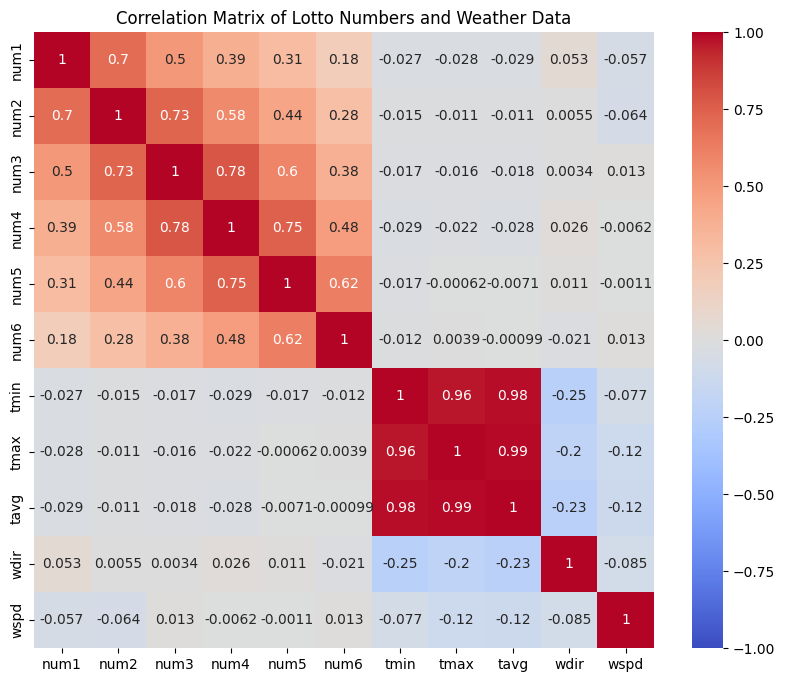

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Lotto Numbers and Weather Data')
plt.show()

In [44]:
cleaned_data

,date,num1,num2,num3,num4,num5,num6,bonus,tmin,tmax,tavg,wdir,wspd
0,2002-12-07,10,23,29,33,37,40,16,-0.1,6.9,5.2,342.0,11.7
3,2002-12-28,14,27,30,31,40,42,2,-5.2,3.5,-0.1,236.0,11.3
4,2003-01-04,16,24,29,40,41,42,3,-14.1,-6.5,-11.4,301.0,14.1
9,2003-02-08,9,25,30,33,41,44,6,-0.1,5.9,4.0,80.0,11.1
11,2003-02-22,2,11,21,25,39,45,44,1.6,4.9,4.2,58.0,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-20,5,10,11,17,28,34,22,25.4,29.3,26.6,180.0,9.4
1129,2024-07-27,15,19,21,25,27,28,40,27.6,31.9,29.0,144.0,6.8
1130,2024-08-03,1,2,6,14,27,38,33,27.5,34.4,30.7,257.0,7.6
1131,2024-08-10,6,7,19,28,34,41,5,26.7,34.6,30.7,335.0,6.1


In [45]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 0 to 1132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1070 non-null   datetime64[ns]
 1   num1    1070 non-null   int64         
 2   num2    1070 non-null   int64         
 3   num3    1070 non-null   int64         
 4   num4    1070 non-null   int64         
 5   num5    1070 non-null   int64         
 6   num6    1070 non-null   int64         
 7   bonus   1070 non-null   int64         
 8   tmin    1070 non-null   float64       
 9   tmax    1070 non-null   float64       
 10  tavg    1070 non-null   float64       
 11  wdir    1070 non-null   float64       
 12  wspd    1070 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(7)
memory usage: 117.0 KB


In [46]:
# 표준화 적용
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [47]:
preparation_data = cleaned_data[['num1', 'num2', 'num3', 'num4', 'num5',  'num6', 'bonus', 'tmin', 'tmax', 'tavg', 'wdir', 'wspd']]

In [48]:
# 표준화
scaler = StandardScaler()
standardized_data = scaler.fit_transform(preparation_data)
standardized_data

array([[ 6.13880915e-01,  1.44134745e+00,  1.21186412e+00, ...,
        -7.91360018e-01,  1.05487146e+00,  5.80377097e-01],
       [ 1.36371263e+00,  2.02508771e+00,  1.34630628e+00, ...,
        -1.29231472e+00,  4.26589303e-02,  4.75707707e-01],
       [ 1.73862848e+00,  1.58728252e+00,  1.21186412e+00, ...,
        -2.36038794e+00,  6.63355291e-01,  1.20839344e+00],
       ...,
       [-1.07324044e+00, -1.62328892e+00, -1.88030551e+00, ...,
         1.61889372e+00,  2.43191601e-01, -4.92484156e-01],
       [-1.35950796e-01, -8.93613597e-01, -1.32557455e-01, ...,
         1.61889372e+00,  9.88027234e-01, -8.84994370e-01],
       [ 1.17625470e+00,  1.27931861e-01,  1.88470315e-03, ...,
         1.59998977e+00,  1.18855990e+00, -9.11161718e-01]])

In [49]:
standardized_df = pd.DataFrame(standardized_data)
standardized_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.613881,1.441347,1.211864,0.893590,0.608303,0.088098,-0.488209,-0.860458,-1.041646,-0.791360,1.054871,0.580377
1,1.363713,2.025088,1.346306,0.627626,1.046216,0.467431,-1.551662,-1.329579,-1.360625,-1.292315,0.042659,0.475708
2,1.738628,1.587283,1.211864,1.824464,1.192187,0.467431,-1.475701,-2.148240,-2.298800,-2.360388,0.663355,1.208393
3,0.426423,1.733218,1.346306,0.893590,1.192187,0.846764,-1.247818,-0.860458,-1.135463,-0.904784,-1.447012,0.423373
4,-0.885783,-0.309873,0.136327,-0.170267,0.900245,1.036431,1.638698,-0.704085,-1.229281,-0.885880,-1.657094,0.894385
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,-0.323409,-0.455808,-1.208095,-1.234123,-0.705435,-1.049903,-0.032443,1.485144,1.059866,1.231363,-0.492095,-0.021472
1066,1.551171,0.857607,0.136327,-0.170267,-0.851406,-2.187903,1.334854,1.687510,1.303791,1.458210,-0.835865,-0.701823
1067,-1.073240,-1.623289,-1.880306,-1.633069,-0.851406,-0.291236,0.803127,1.678312,1.538335,1.618894,0.243192,-0.492484
1068,-0.135951,-0.893614,-0.132557,0.228679,0.170390,0.277764,-1.323779,1.604724,1.557098,1.618894,0.988027,-0.884994


In [50]:
# 정규화 적용
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(preparation_data)
normalized_data

array([[0.26470588, 0.6       , 0.7027027 , ..., 0.41356674, 0.95264624,
        0.3422619 ],
       [0.38235294, 0.71428571, 0.72972973, ..., 0.297593  , 0.65738162,
        0.33035714],
       [0.44117647, 0.62857143, 0.7027027 , ..., 0.05032823, 0.83844011,
        0.41369048],
       ...,
       [0.        , 0.        , 0.08108108, ..., 0.97155361, 0.71587744,
        0.2202381 ],
       [0.14705882, 0.14285714, 0.43243243, ..., 0.97155361, 0.93314763,
        0.17559524],
       [0.35294118, 0.34285714, 0.45945946, ..., 0.96717724, 0.99164345,
        0.17261905]])

In [52]:
normalized_df = pd.DataFrame(normalized_data)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.264706,0.600000,0.702703,0.729730,0.800000,0.814815,0.340909,0.360000,0.332589,0.413567,0.952646,0.342262
1,0.382353,0.714286,0.729730,0.675676,0.885714,0.888889,0.022727,0.246667,0.256696,0.297593,0.657382,0.330357
2,0.441176,0.628571,0.702703,0.918919,0.914286,0.888889,0.045455,0.048889,0.033482,0.050328,0.838440,0.413690
3,0.235294,0.657143,0.729730,0.729730,0.914286,0.962963,0.113636,0.360000,0.310268,0.387309,0.222841,0.324405
4,0.029412,0.257143,0.486486,0.513514,0.857143,1.000000,0.977273,0.397778,0.287946,0.391685,0.161560,0.377976
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,0.117647,0.228571,0.216216,0.297297,0.542857,0.592593,0.477273,0.926667,0.832589,0.881838,0.501393,0.273810
1066,0.411765,0.485714,0.486486,0.513514,0.514286,0.370370,0.886364,0.975556,0.890625,0.934354,0.401114,0.196429
1067,0.000000,0.000000,0.081081,0.216216,0.514286,0.740741,0.727273,0.973333,0.946429,0.971554,0.715877,0.220238
1068,0.147059,0.142857,0.432432,0.594595,0.714286,0.851852,0.090909,0.955556,0.950893,0.971554,0.933148,0.175595


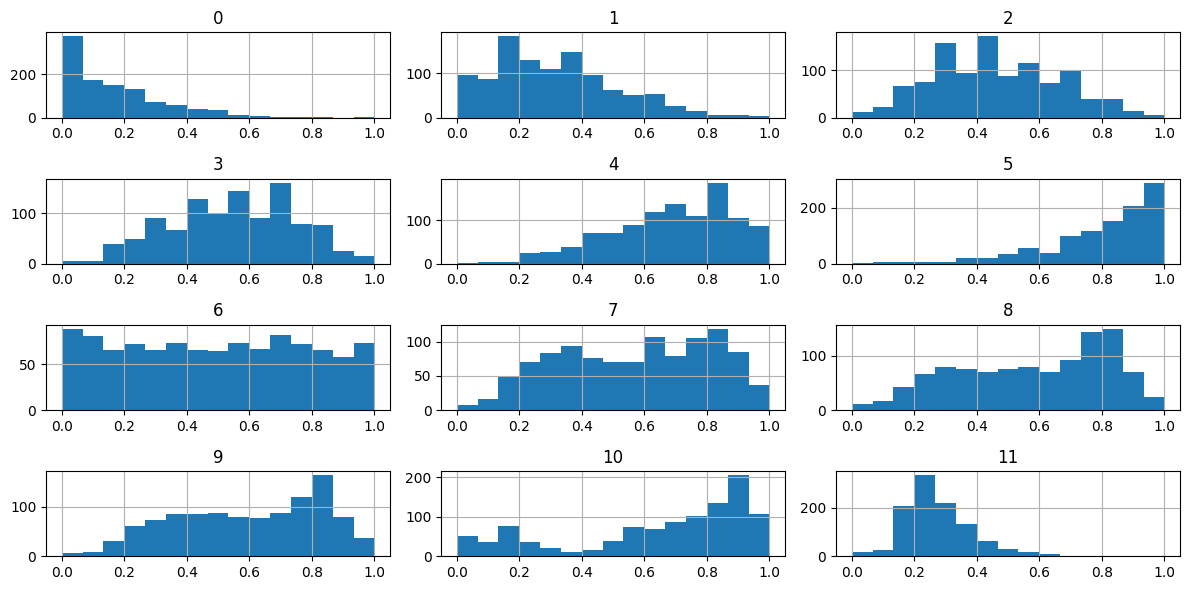

In [53]:
# 표준화된 데이터와 정규화된 데이터 비교 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 표준화된 데이터 히스토그램
standardized_df.hist(ax=ax[0], bins=15)
ax[0].set_title('Standardized Data')

# 정규화된 데이터 히스토그램
normalized_df.hist(ax=ax[1], bins=15)
ax[1].set_title('Normalized Data')

plt.tight_layout()
plt.show()

In [54]:
corr_standardized_df = standardized_df.corr()

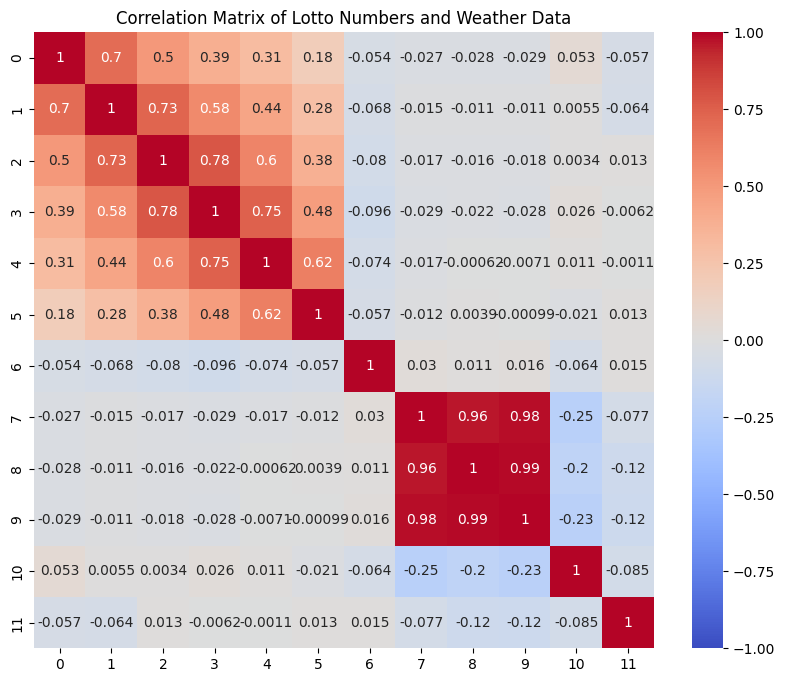

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_standardized_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Lotto Numbers and Weather Data')
plt.show()

In [56]:
corr_normalized_df = normalized_df.corr()

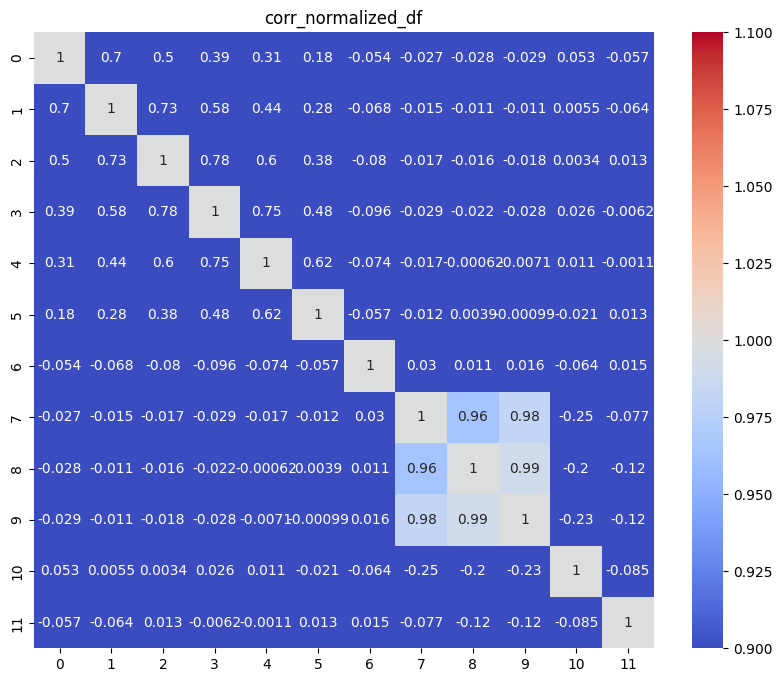

In [57]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_normalized_df, annot=True, cmap='coolwarm', vmin=1, vmax=1)
plt.title("corr_normalized_df")
plt.show()

In [58]:
check_num1 = Counter(cleaned_data['num1'])
check_num1

Counter({1: 148,
         2: 118,
         3: 110,
         4: 92,
         6: 84,
         5: 81,
         7: 68,
         8: 52,
         10: 44,
         9: 38,
         12: 37,
         11: 36,
         13: 32,
         14: 27,
         16: 23,
         17: 19,
         15: 15,
         19: 10,
         21: 8,
         18: 7,
         22: 5,
         20: 5,
         26: 3,
         23: 3,
         35: 1,
         25: 1,
         29: 1,
         24: 1,
         27: 1})

In [59]:
lotto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1133 non-null   datetime64[ns]
 1   num1    1133 non-null   int64         
 2   num2    1133 non-null   int64         
 3   num3    1133 non-null   int64         
 4   num4    1133 non-null   int64         
 5   num5    1133 non-null   int64         
 6   num6    1133 non-null   int64         
 7   bonus   1133 non-null   int64         
dtypes: datetime64[ns](1), int64(7)
memory usage: 70.9 KB


In [60]:
# 필요한 컬럼 선택
lotto_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
correlation_lotto_data = lotto_data[lotto_columns] 

In [61]:
# 상관관계 계산
correlation_matrix_lotto = correlation_lotto_data.corr()

In [62]:
# 번호 빈도수 계산
number_counts = Counter(correlation_lotto_data['num1'].values.flatten())

In [63]:
import numpy as np

In [64]:
unique_values = np.sort(lotto_data['num1'].unique())
unique_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 35])

In [65]:
number_counts

Counter({1: 157,
         2: 122,
         3: 116,
         4: 100,
         6: 90,
         5: 89,
         7: 71,
         8: 54,
         10: 45,
         12: 40,
         9: 39,
         11: 39,
         13: 33,
         14: 32,
         16: 23,
         17: 19,
         15: 15,
         19: 12,
         21: 8,
         18: 7,
         22: 5,
         20: 5,
         26: 3,
         23: 3,
         24: 2,
         35: 1,
         25: 1,
         29: 1,
         27: 1})

In [66]:
# 빈도수 기반 확률 분포 계산
total_counts = sum(number_counts.values())
total_counts

1133

In [67]:
# 빈도수 기반 확률 분포 계산
num_probabilities = {num: count / total_counts for num, count in number_counts.items()}

In [68]:
########### 확률에 기반한 로또 번호 생성기 생성 ############

In [69]:
from collections import defaultdict

lotto_columns = ['num1', 'num2', 'num3', 'num4', 'num5', 'num6']
# 번호 간의 빈도수 계산
transition_counts = defaultdict(lambda: defaultdict(int))

for i in range(len(lotto_columns) - 1):
    current_num = lotto_columns[i]
    next_num = lotto_columns[i+1]

    for _, row in lotto_data.iterrows():
        transition_counts[row[current_num]][row[next_num]] += 1

In [70]:
# 확률 계산
transition_probabilities =  defaultdict(dict)

for current_num, next_counts in transition_counts.items():
    total = sum(next_counts.values())
    for next_num, count in next_counts.items():
        transition_probabilities[current_num][next_num] = count/total

In [71]:
# num1의 빈도수 계산 (Counter 객체)
num1_counts = Counter(lotto_data['num1'])

In [72]:
# num1의 확률 계산
total_num1_counts = sum(num1_counts.values())
num1_probabilities = {num: count/total_num1_counts for num, count in num1_counts.items()}

In [73]:
# 번호 생성 함수
def generate_lotto_number(num1_probabilities, transition_probabilities):
    lotto_numbers = []

    # 첫 번째 번호 선택 (빈도수 기반 확률적 선택)
    num1 = np.random.choice(list(num1_probabilities.keys()), p=list(num1_probabilities.values()))
    lotto_numbers.append(num1)

    # 나머지 번호 선택 (상관관계 기반)
    for i in range(1, 6):
        previous_num = lotto_numbers[-1]
        next_num_probabilities = transition_probabilities.get(previous_num, None)

        if next_num_probabilities:
            next_nums = list(next_num_probabilities.keys())
            probabilities = list(next_num_probabilities.values())
            next_num = np.random.choice(next_nums, p=probabilities)
        else:
            next_num = np.random.choice(list(num1_probabilities.keys()), p=list(num1_probabilities.values()))

        lotto_numbers.append(next_num)

    return lotto_numbers

In [74]:
# 로또 번호 생성 예제

generated_numbers = generate_lotto_number(num1_probabilities, transition_probabilities)
print("생성된 로또 번호: ", generated_numbers)

생성된 로또 번호:  [3, 4, 16, 19, 22, 37]


In [75]:
unique_values6 = np.sort(lotto_data['num6'].unique())
unique_values6

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])